In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

In [385]:
matches=pd.read_csv('/Users/y2z/Desktop/DATASETS/train.csv')
deliveries=pd.read_csv('/Users/y2z/Desktop/deliveries.csv')
matches.shape,deliveries.shape
matches.columns,deliveries.columns


(Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
        'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
        'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
        'umpire3'],
       dtype='object'),
 Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
        'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
        'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
        'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
        'dismissal_kind', 'fielder'],
       dtype='object'))

In [386]:
matches.shape

(636, 18)

In [387]:
matches=matches.drop('umpire3',axis=1)

In [388]:
matches.shape

(636, 17)

In [389]:
matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [390]:

matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)


In [391]:
print('Total matches played:',matches.shape[0])

Total matches played: 636


In [392]:
print('Venues played at:',matches['city'].unique())

Venues played at: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]


In [393]:
print('Total venues played at:',matches['city'].nunique())

Total venues played at: 30


In [394]:
print('Teams:',matches['team1'].unique())

Teams: ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW']


In [395]:
print('Total teams:',matches['team1'].nunique())

Total teams: 13


In [396]:
print('Most number of MOTM:',(matches['player_of_match'].value_counts()).idxmax())

Most number of MOTM: CH Gayle


In [397]:
print('Most number of wins for a team:',(matches['winner'].value_counts()).idxmax())

Most number of wins for a team: MI


In [398]:
print('Team with win by most runs:',(matches['win_by_runs'].max()))

Team with win by most runs: 146


In [399]:
print('Team with win by most wickets:',(matches['win_by_wickets'].max()))

Team with win by most wickets: 10


In [400]:
print('Toss decision in %\n',matches['toss_decision'].value_counts()/636*100)

Toss decision in %
 field    57.075472
bat      42.924528
Name: toss_decision, dtype: float64


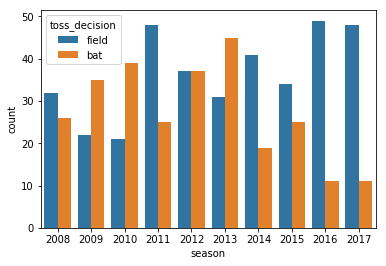

In [401]:
plt.subplot()
sns.countplot(x='season',hue='toss_decision',data=matches)
plt.show()

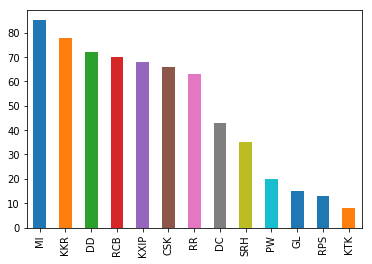

In [402]:
plt.subplot()
matches['toss_winner'].value_counts().plot.bar()
plt.show()

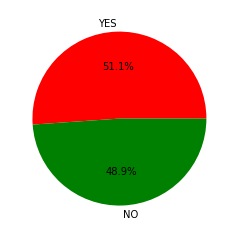

In [403]:
df=matches[matches['toss_winner']==matches['winner']]
slices=[len(df),636-len(df)]
labels=['YES','NO']
plt.pie(slices,labels=labels,autopct='%1.1f%%',colors=['r','g'])
plt.show()

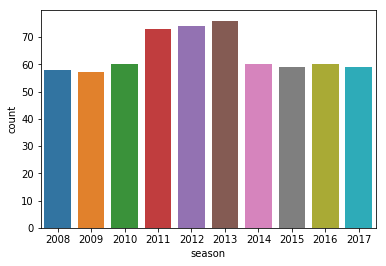

In [404]:
plt.subplot()
sns.countplot(x='season',data=matches)
plt.show()

In [405]:
matches.columns,deliveries.columns

(Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
        'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
        'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
       dtype='object'),
 Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
        'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
        'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
        'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
        'dismissal_kind', 'fielder'],
       dtype='object'))

In [406]:
matches['id'].head()

0    1
1    2
2    3
3    4
4    5
Name: id, dtype: int64

In [407]:
deliveries['match_id'].head()

0    1
1    1
2    1
3    1
4    1
Name: match_id, dtype: int64

In [408]:
batsmen=matches[['id','season']].merge(deliveries,left_on='id',right_on='match_id').drop('id',axis=1)
batsmen.shape

(150460, 22)

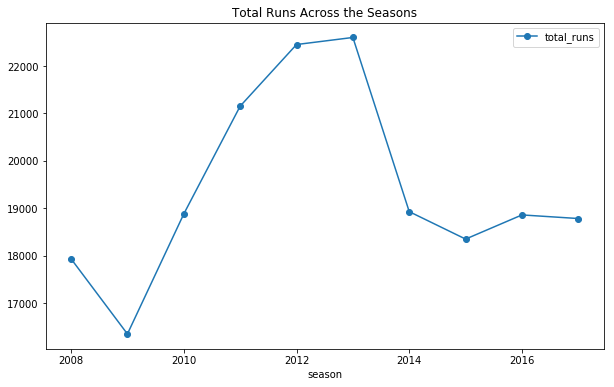

In [409]:
batsmen = matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')
plt.gcf().set_size_inches(10,6)
plt.title('Total Runs Across the Seasons')
plt.show()

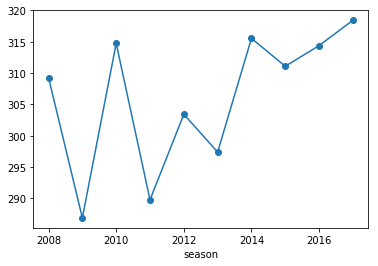

In [410]:
avg_runs_each_season=matches.groupby('season').count().id.reset_index()
avg_runs_each_season['total_runs']=season['total_runs']
avg_runs_each_season['avg_runs_per_match']=avg_runs_each_season['total_runs']/avg_runs_each_season['id']
avg_runs_each_season.set_index('season')['avg_runs_per_match'].plot(marker='o')

In [411]:
avg_runs_each_season

,season,id,total_runs,avg_runs_per_match
0,2008,58,17937,309.258621
1,2009,57,16353,286.894737
2,2010,60,18883,314.716667
3,2011,73,21154,289.780822
4,2012,74,22453,303.418919
5,2013,76,22602,297.394737
6,2014,60,18931,315.516667
7,2015,59,18353,311.067797
8,2016,60,18862,314.366667
9,2017,59,18786,318.406780


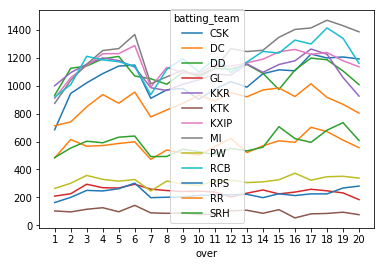

In [412]:
runs_per_over=deliveries.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over.plot()
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x)
plt.show()

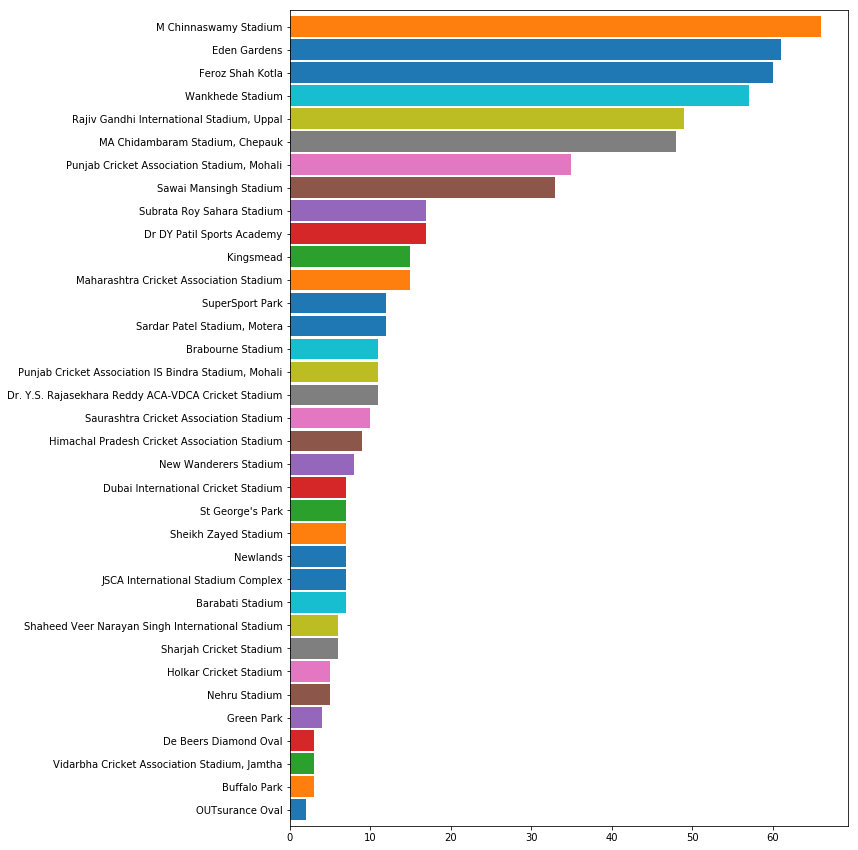

In [413]:
plt.subplots(figsize=(10,15))
matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=0.9)
plt.show()

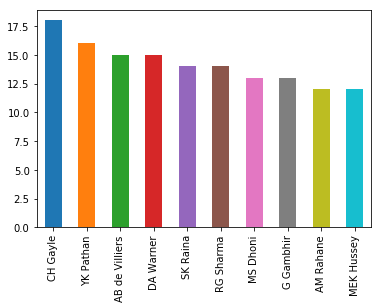

In [414]:
matches['player_of_match'].value_counts().head(10).plot.bar()


In [415]:
print('Winners by year')
for i in range(2008,2017):
    df=matches[matches['season']==i].iloc[-1]
    print(df[[1,10]].values)

Winners by year
[2008 'RR']
[2009 'DC']
[2010 'CSK']
[2011 'CSK']
[2012 'KKR']
[2013 'MI']
[2014 'KKR']
[2015 'MI']
[2016 'SRH']


In [425]:
print('Total matches with super overs:',deliveries[deliveries['is_super_over']==1].match_id.nunique())

Total matches with super overs: 7


In [434]:
teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
play=deliveries[deliveries['is_super_over']==True].batting_team.unique()
print('Teams which have not played in a super over are:',list(set(teams)-set(play)))

Teams which have not played in a super over are: ['PW', 'RPS', 'KTK', 'DC']


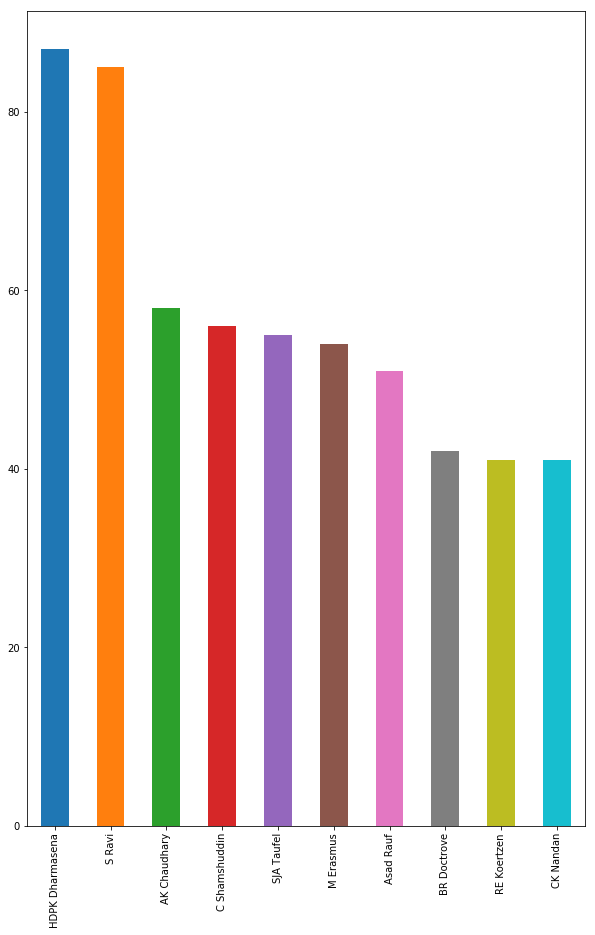

In [445]:
plt.subplots(figsize=(10,15))
ump=pd.concat([matches['umpire1'],matches['umpire2']]).sort_values(ascending=True)
ump.value_counts().head(10).plot.bar()
plt.show()

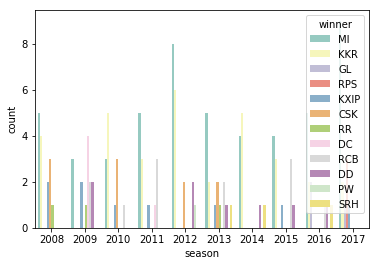

In [460]:
def team1_vs_team2(team1,team2):
    mt1=matches[((matches['team1']==team1)|(matches['team2']==team1)&(matches['team1']==team2)|(matches['team2']==team2))]
    sns.countplot(x='season',hue='winner',data=mt1,palette='Set3')
    plt.show()
team1_vs_team2('KKR','MI')

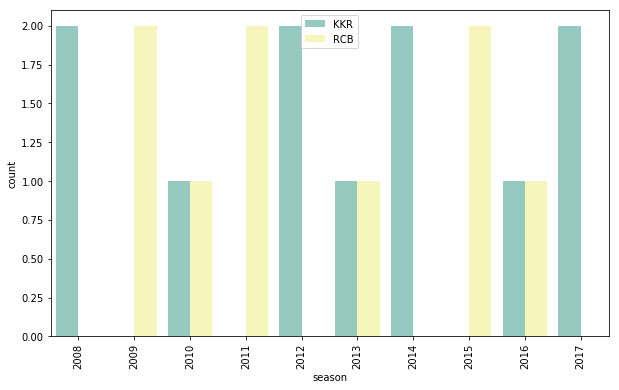

In [467]:
def team1_vs_team2(team1,team2):
    mt1=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
    sns.countplot(x='season', hue='winner',data=mt1,palette='Set3')
    plt.xticks(rotation='vertical')
    leg = plt.legend( loc = 'upper center')
    fig=plt.gcf()
    fig.set_size_inches(10,6)
    plt.show()
team1_vs_team2('KKR','RCB')

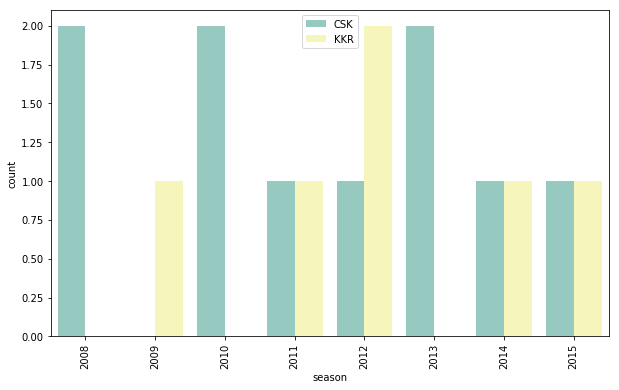

In [463]:
team1_vs_team2('KKR','CSK')

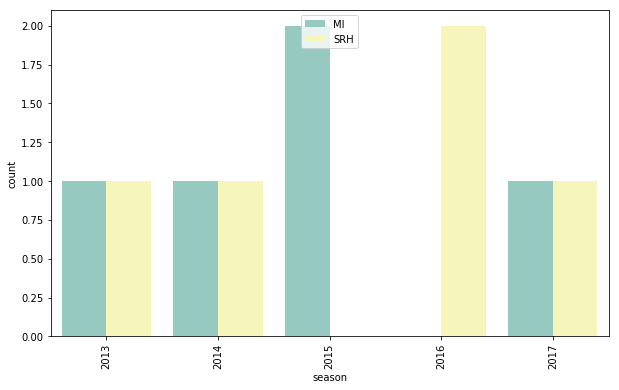

In [464]:
team1_vs_team2('SRH','MI')

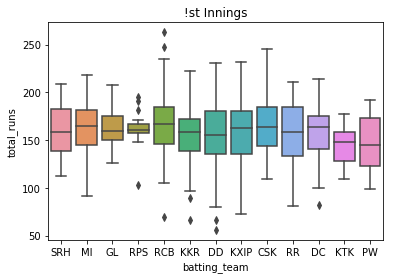

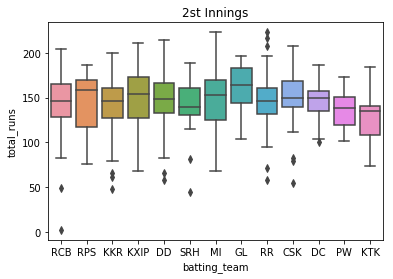

In [493]:
# plt.subplots(figsize=(10,16))
xyz=deliveries.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
xyz.drop('match_id',axis=1,inplace=True)
one_innings=xyz[xyz['inning']==1]
second_innings=xyz[xyz['inning']==2]
oi=sns.boxplot(y='total_runs',x='batting_team',data=one_innings).set_title('!st Innings')
plt.show()
si=sns.boxplot(y='total_runs',x='batting_team',data=second_innings).set_title('2st Innings')
plt.show()

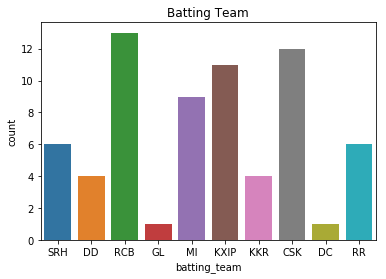

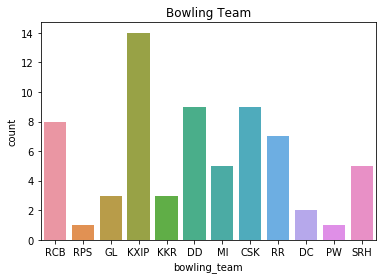

In [514]:
high_scores=deliveries.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores=high_scores[high_scores['total_runs']>=200]
a=high_scores.nlargest(10,'total_runs')
sns.countplot(high_scores['batting_team']).set_title('Batting Team')
plt.show()
sns.countplot(high_scores['bowling_team']).set_title('Bowling Team')
plt.show()




In [517]:
team=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
print('Teams which have not scored more than 200',list(set(team)-set(high_scores['batting_team'])))
print('Teams which have not conceeded more than 200',list(set(team)-set(high_scores['bowling_team'])))

Teams which have not scored more than 200 ['PW', 'RPS', 'KTK']
Teams which have not conceeded more than 200 ['KTK']


In [521]:
high_score=deliveries.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_score

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
1,1,2,RCB,SRH,172
2,2,1,MI,RPS,184
3,2,2,RPS,MI,187
4,3,1,GL,KKR,183
5,3,2,KKR,GL,184
6,4,1,RPS,KXIP,163
7,4,2,KXIP,RPS,164
8,5,1,RCB,DD,157
9,5,2,DD,RCB,142


# 

In [530]:
high_score1=high_score[high_score['inning']==1]
high_score2=high_score[high_score['inning']==2]
high_score1

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
2,2,1,MI,RPS,184
4,3,1,GL,KKR,183
6,4,1,RPS,KXIP,163
8,5,1,RCB,DD,157
10,6,1,GL,SRH,135
12,7,1,KKR,MI,178
14,8,1,RCB,KXIP,148
16,9,1,DD,RPS,205
18,10,1,SRH,MI,158


In [561]:
high_scores=deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores1=high_scores[high_scores['inning']==1]
high_scores2=high_scores[high_scores['inning']==2]
high_scores1=high_scores1.merge(high_scores2[['match_id','inning', 'total_runs']], on='match_id')
high_scores1.rename(columns={'inning_x':'inning_1','inning_y':'inning_2','total_runs_x':'inning1_runs','total_runs_y':'inning2_runs'},inplace=True)
high_scores1=high_scores1[high_scores1['inning1_runs']>=200]
high_scores1['is_score_chased']=1
high_scores1['is_score_chased'] = np.where(high_scores1['inning1_runs']<=high_scores1['inning2_runs'], 
                                           'yes', 'no')
high_scores1[high_scores1['is_score_chased']=='yes'].head()

,match_id,inning_1,batting_team,bowling_team,inning1_runs,inning_2,inning2_runs,is_score_chased
40,41,1,GL,DD,208,2,214,yes
67,68,1,DC,RR,214,2,217,yes
180,181,1,KXIP,RCB,203,2,204,yes
207,208,1,KKR,KXIP,200,2,204,yes
318,320,1,RCB,CSK,205,2,208,yes


In [576]:
slices=high_scores1['is_score_chased'].value_counts().reset_index().is_score_chased

In [577]:
list(slices)
label=['Score_not_chased','Score_chased']

([<matplotlib.patches.Wedge at 0x1a2994c860>,
 [Text(-0.9910657674599292, 0.4772720865178076, 'Score_not_chased'),
  Text(0.9910657898026469, -0.47727204012267027, 'Score_chased')],
 [Text(-0.5405813277054159, 0.2603302290097132, '85.7%'),
  Text(0.5405813398923528, -0.2603302037032747, '14.3%')])

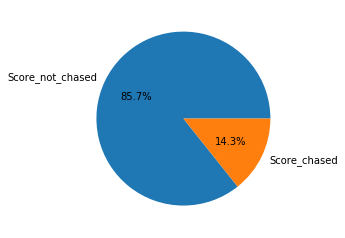

In [578]:
plt.pie(slices,autopct='%1.1f%%',labels=label)

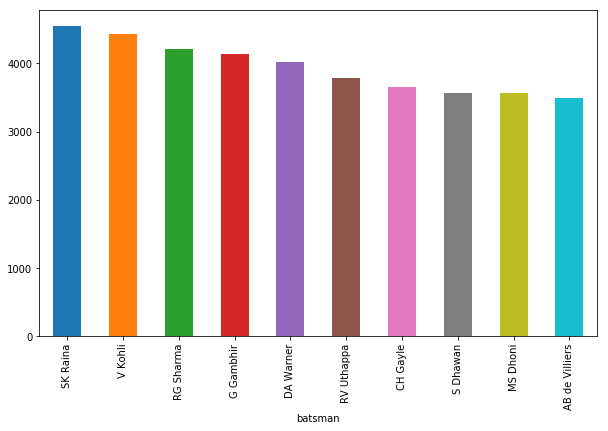

In [606]:
plt.subplots(figsize=(10,6))
max_runs=deliveries.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar()
plt.show()
# max_runs

In [611]:
top_scores=deliveries.groupby(['match_id','batsman','batting_team',])['batsman_runs'].sum().reset_index()

In [624]:
top_scores.sort_values('batsman_runs',ascending=False).head(10)
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

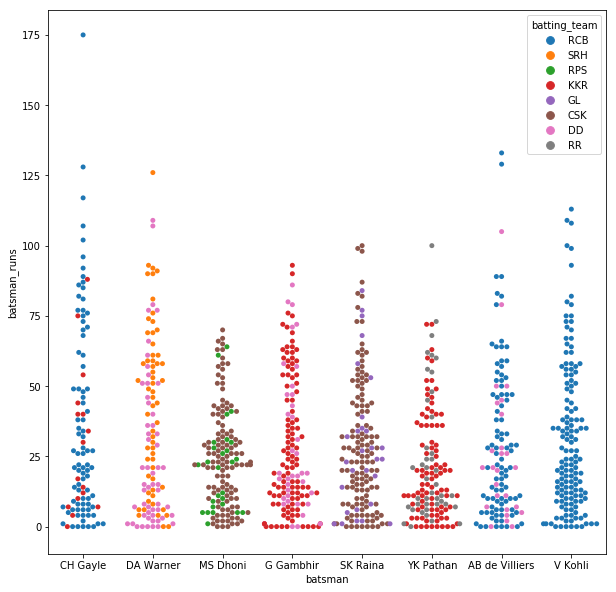

In [644]:
plt.subplots(figsize=(10,10))
swarm=['CH Gayle','V Kohli','G Gambhir','SK Raina','YK Pathan','MS Dhoni','AB de Villiers','DA Warner']
most_runs=deliveries.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index()
most_runs=most_runs[top_scores['batsman'].isin(swarm)]
sns.swarmplot(x='batsman',y='batsman_runs',hue='batting_team',data=most_runs)
plt.show()

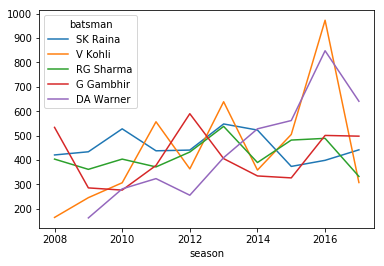

In [692]:
a=batsmen.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
a=a.groupby(['season','batsman'])['batsman_runs'].sum().unstack().T
a['Total']=a.sum(axis=1)
a=a.sort_values(by='Total',ascending=False)[:5]
a.drop('Total',inplace=True,axis=1)
a.T.plot()
plt.show()

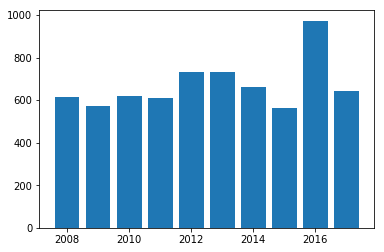

In [726]:
orange=matches[['id','season']]
orange=orange.merge(deliveries,left_on='id',right_on='match_id',how='left')
orange=orange.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
orange=orange.sort_values('batsman_runs',ascending=False)
orange=orange.drop_duplicates(subset=['season'])
orange=orange.sort_values(by='season',ascending=False)
orange
plt.bar(x=orange.season,height=orange.batsman_runs)
plt.show()

In [716]:
orange

,season,batsman,batsman_runs
1422,2017,DA Warner,641
1383,2016,V Kohli,973
1148,2015,DA Warner,562
1088,2014,RV Uthappa,660
910,2013,MEK Hussey,733
684,2012,CH Gayle,733
502,2011,CH Gayle,608
446,2010,SR Tendulkar,618
229,2009,ML Hayden,572
115,2008,SE Marsh,616


In [780]:
overs=deliveries.groupby(['bowler']).sum()
overs['total balls']=deliveries['bowler'].value_counts()
overs['overs']=overs['total balls']/6
overs[overs['overs']>=200].sort_values(by='overs',ascending=False)['over'].reset_index().head()

,bowler,over
0,Harbhajan Singh,29271
1,A Mishra,31208
2,SL Malinga,29741
3,P Kumar,20159
4,PP Chawla,29584


In [781]:
overs['eco']=overs['total_runs']/overs['overs']
overs[overs['overs']>=300].sort_values(by='eco',ascending=True)['eco'].reset_index().head(10)

,bowler,eco
0,SP Narine,6.395706
1,R Ashwin,6.490886
2,DW Steyn,6.600278
3,SL Malinga,6.757238
4,Harbhajan Singh,6.931415
5,B Kumar,7.039922
6,A Mishra,7.336293
7,PP Ojha,7.400514
8,Z Khan,7.539543
9,P Kumar,7.604096


In [782]:
dismissal_kind= ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
purple=deliveries[deliveries['dismissal_kind'].isin(dismissal_kind)]
purple=purple.merge(matches,left_on='match_id',right_on='id',how='outer')
purple=purple.groupby(['season','bowler'])['dismissal_kind'].count().reset_index()

In [783]:
purple.head()

,season,bowler,dismissal_kind
0,2008,A Kumble,7
1,2008,A Mishra,11
2,2008,A Nehra,12
3,2008,A Nel,1
4,2008,AA Noffke,1


In [784]:
purple=purple.sort_values('dismissal_kind',ascending=False)
purple=purple.drop_duplicates(['season']).sort_values(by='season')
purple=purple.rename({'dismissal_kind':'Wicket_count'},axis=1)
purple

,season,bowler,Wicket_count
75,2008,Sohail Tanvir,22
152,2009,RP Singh,23
241,2010,PP Ojha,21
367,2011,SL Malinga,28
437,2012,M Morkel,25
509,2013,DJ Bravo,32
639,2014,MM Sharma,23
695,2015,DJ Bravo,26
774,2016,B Kumar,23
861,2017,B Kumar,26


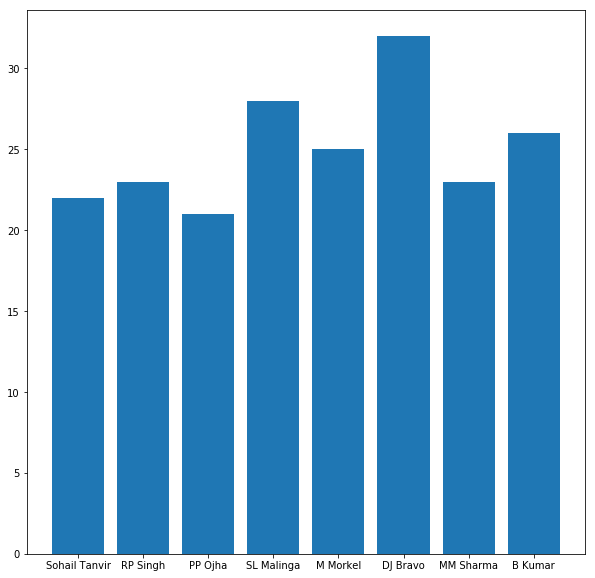

In [793]:
plt.subplots(figsize=(10,10))
plt.bar(height=purple.Wicket_count,x=purple.bowler)
# a.xticks=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']
plt.show()

In [807]:
ax=deliveries[deliveries['batsman_runs']==6].batting_team.value_counts().reset_index()
ax2=deliveries[deliveries['batsman_runs']==4].batting_team.value_counts().reset_index()
ax=ax.merge(ax2,left_on='index',right_on='index',how='left')
ax.rename({'index':'Team','batting_team_x':'Sixes','batting_team_y':'Fours'},axis=1,inplace=True)
ax

,Team,Sixes,Fours
0,RCB,935,1978
1,MI,876,2145
2,KXIP,762,2083
3,CSK,742,1770
4,DD,686,1970
5,KKR,659,1978
6,RR,538,1630
7,DC,400,957
8,SRH,364,999
9,PW,196,525


<BarContainer object of 13 artists>

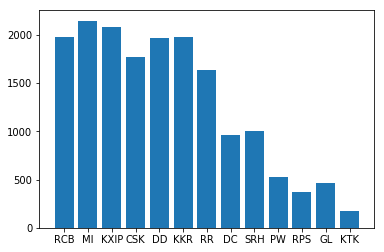

In [815]:
plt.bar(x=ax.Team,height=ax.Fours)

<BarContainer object of 13 artists>

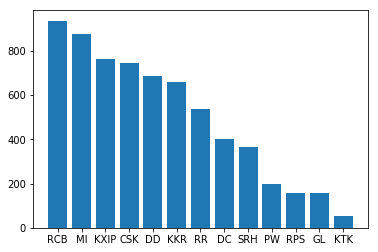

In [813]:
plt.bar(x=ax.Team,height=ax.Sixes)

In [864]:
finals=matches.drop_duplicates(subset='season',keep='last')
finals=finals.sort_values(by='season')
finals=finals[['id','season','city','team1','team2','toss_winner','toss_decision','winner']]
most_finals=pd.concat([finals['team1'],finals['team2']]).value_counts().reset_index()
most_finals.rename({'index':'Team',0:'No_of_Finals'},axis=1,inplace=True)
xyz=finals['winner'].value_counts().reset_index()
most_finals=most_finals.merge(xyz,left_on='Team',right_on='index',how='outer')

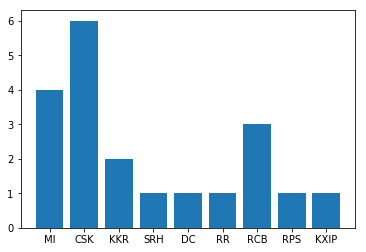

In [869]:
most_finals=most_finals.replace(np.NaN,0)
# most_finals.drop(['index'],axis=1,inplace=True)
most_finals=most_finals.sort_values(by='winner',ascending=False)
plt.bar(x=most_finals.Team,height=most_finals.No_of_Finals)
plt.show()

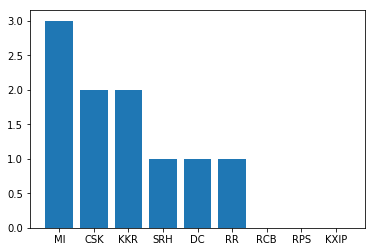

In [870]:
plt.bar(x=most_finals.Team,height=most_finals.winner)
plt.show()

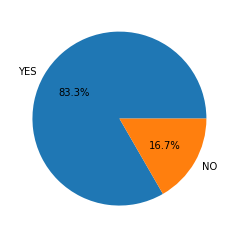

In [879]:
df=finals[finals['toss_winner']==finals['winner']]
slice=[len(finals),9-len(df)]
labels=['YES','NO']
plt.pie(slice,labels=labels,autopct='%1.1f%%')
plt.show()